# Generate data for training models for optimizing DL-NMR methods

### First load some dependencies and required files for data generation

In [1]:
## Load dependencies and set defaults

# Import dependencies
import numpy as np
import os
import nmrglue as ng
import random
import matplotlib.pyplot as plt

In [2]:
## Load function for varying line-broadening

def exponential_apodization(input_array, apodization_frequency):
    length = len(v400)
    time = np.arange(length)
    decay_factor = np.exp(-time * apodization_frequency * 2 * np.pi / length)
    return input_array * decay_factor

In [3]:
# Set default plot size
plt.rcParams["figure.figsize"] = (30,20)

## Generate training, testing, and validation datasets with 21 metabolites. Incoporating experimental variations in the form of noise, peakshift, and baseline shift, and incorporating random singlets and multiplets.

In [4]:
sorted(os.listdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/21Met/400'))

['HMDB0000001_5293_predicted_H_400.jdx',
 'HMDB0000042_5433_predicted_H_400.jdx',
 'HMDB0000064_142010_predicted_H_400.jdx',
 'HMDB0000123_142330_predicted_H_400.jdx',
 'HMDB0000142_142510_predicted_H_400.jdx',
 'HMDB0000157_5892_predicted_H_400.jdx',
 'HMDB0000161_142610_predicted_H_400.jdx',
 'HMDB0000176_142710_predicted_H_400.jdx',
 'HMDB0000177_142730_predicted_H_400.jdx',
 'HMDB0000182_142751_predicted_H_400.jdx',
 'HMDB0000190_6073_predicted_H_400.jdx',
 'HMDB0000195_142811_predicted_H_400.jdx',
 'HMDB0000243_143151_predicted_H_400.jdx',
 'HMDB0000254_143210_predicted_H_400.jdx',
 'HMDB0000292_143350_predicted_H_400.jdx',
 'HMDB0000562_144351_predicted_H_400.jdx',
 'HMDB0000687_144830_predicted_H_400.jdx',
 'HMDB0000883_7862_predicted_H_400.jdx',
 'HMDB0000902_7943_predicted_H_400.jdx',
 'HMDB0001406_95939_predicted_H_400.jdx',
 'HMDB0003345_135690_predicted_H_400.jdx']

In [4]:
## Read in simulated spectra of metabolites downloaded from HMDB. And create singlet and triplets to add at random.


## First for 400-MHz data
# First load quantitative reference
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/21Met/400/')  # Switch to appropriate folders and load data
vd400, v400 = ng.jcampdx.read('HMDB0000176_142710_predicted_H_400.jdx') # maleic acid, our quantitative reference
v400 = ng.process.proc_base.cs(v400, 28305)  # Shift maleic acid peak to 0 ppm to simulate a TSP peak (need to find good simulated TSP peak)

# Load spectra of simulated standards to be analytes
filenames400 = os.listdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/21Met/400')  # Get a list of filenames in the directory
filenames400 = sorted(filenames400)
standardsSpec400 =[]  # initialize variable to hold spectra of standards
standardsDictionary400 = []  # initialize variable to hold dictionaries of spectra of standards
for i in np.arange(len(filenames400)):
    dic, data = ng.jcampdx.read(filenames400[i])
    standardsSpec400.append(data)
    standardsDictionary400.append(dic)
standardsSpec400 = np.array(standardsSpec400)  

## Generate a singlet and tripelet at 400-MHz
#Singlet
sing_d400, sing400 = ng.jcampdx.read('HMDB0000042_5433_predicted_H_400.jdx') # acetic acid, for adding random singlets
Singlet400 = sing400[sing400 != 0]  # make variable of acetic acid without zeros
#Triplet
trip_d400, trip400 = ng.jcampdx.read('HMDB0000254_143210_predicted_H_400.jdx') 
Triplet400 = trip400[trip400 != 0]  # make variable of succinate (although true signal is singlet, not triplet) without zeros





## Repeat for 100-MHz data
# First load quantitative reference
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/21Met/100/')  # Switch to appropriate folders and load data
vd100, v100 = ng.jcampdx.read('HMDB0000176_142710_predicted_H_100.jdx') # maleic acid, our quantitative reference
v100 = ng.process.proc_base.cs(v100, 28305)  # Shift maleic acid peak to 0 ppm to simulate a TSP peak (need to find good simulated TSP peak)

# Load spectra of simulated standards to be analytes
filenames100 = os.listdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/21Met/100')  # Get a list of filenames in the directory
filenames100 = sorted(filenames100)
standardsSpec100 =[]  # initialize variable to hold spectra of standards
standardsDictionary100 = []  # initialize variable to hold dictionaries of spectra of standards
for i in np.arange(len(filenames100)):
    dic, data = ng.jcampdx.read(filenames100[i])
    standardsSpec100.append(data)
    standardsDictionary100.append(dic)
standardsSpec100 = np.array(standardsSpec100)  

## Generate a singlet and tripelet at 100-MHz
#Singlet generation
sing_d100, sing100 = ng.jcampdx.read('HMDB0000042_5433_predicted_H_100.jdx') # acetic acid, for adding random singlets
Singlet100 = sing100[sing100 != 0]  # make variable of acetic acid without zeros
Singlet100 = Singlet100[4503:7498] # make variable smaller as it extends very far (hopefully this isn't a mistake that affects accuracy...) Made it same size as 400-MHz signal for consistentent placement.
#Triplet genertation
trip_d100, trip100 = ng.jcampdx.read('HMDB0000254_143210_predicted_H_100.jdx') 
Triplet100 = trip100[trip100 != 0]  # make variable of succinate (although true signal is singlet, not triplet) without zeros
Triplet100 = Triplet100[6345:-6345] # make variable smaller as it extends very far (hopefully this isn't a mistake that affects accuracy...) Made it same size as 400-MHz signal for consistentent placement.



## Create ppm scale for plotting ppm rather than just data point numbers for x-axis
ppm_all = (np.linspace(12.5, -2.5, 65536))
ppm = ppm_all[10000:56000]

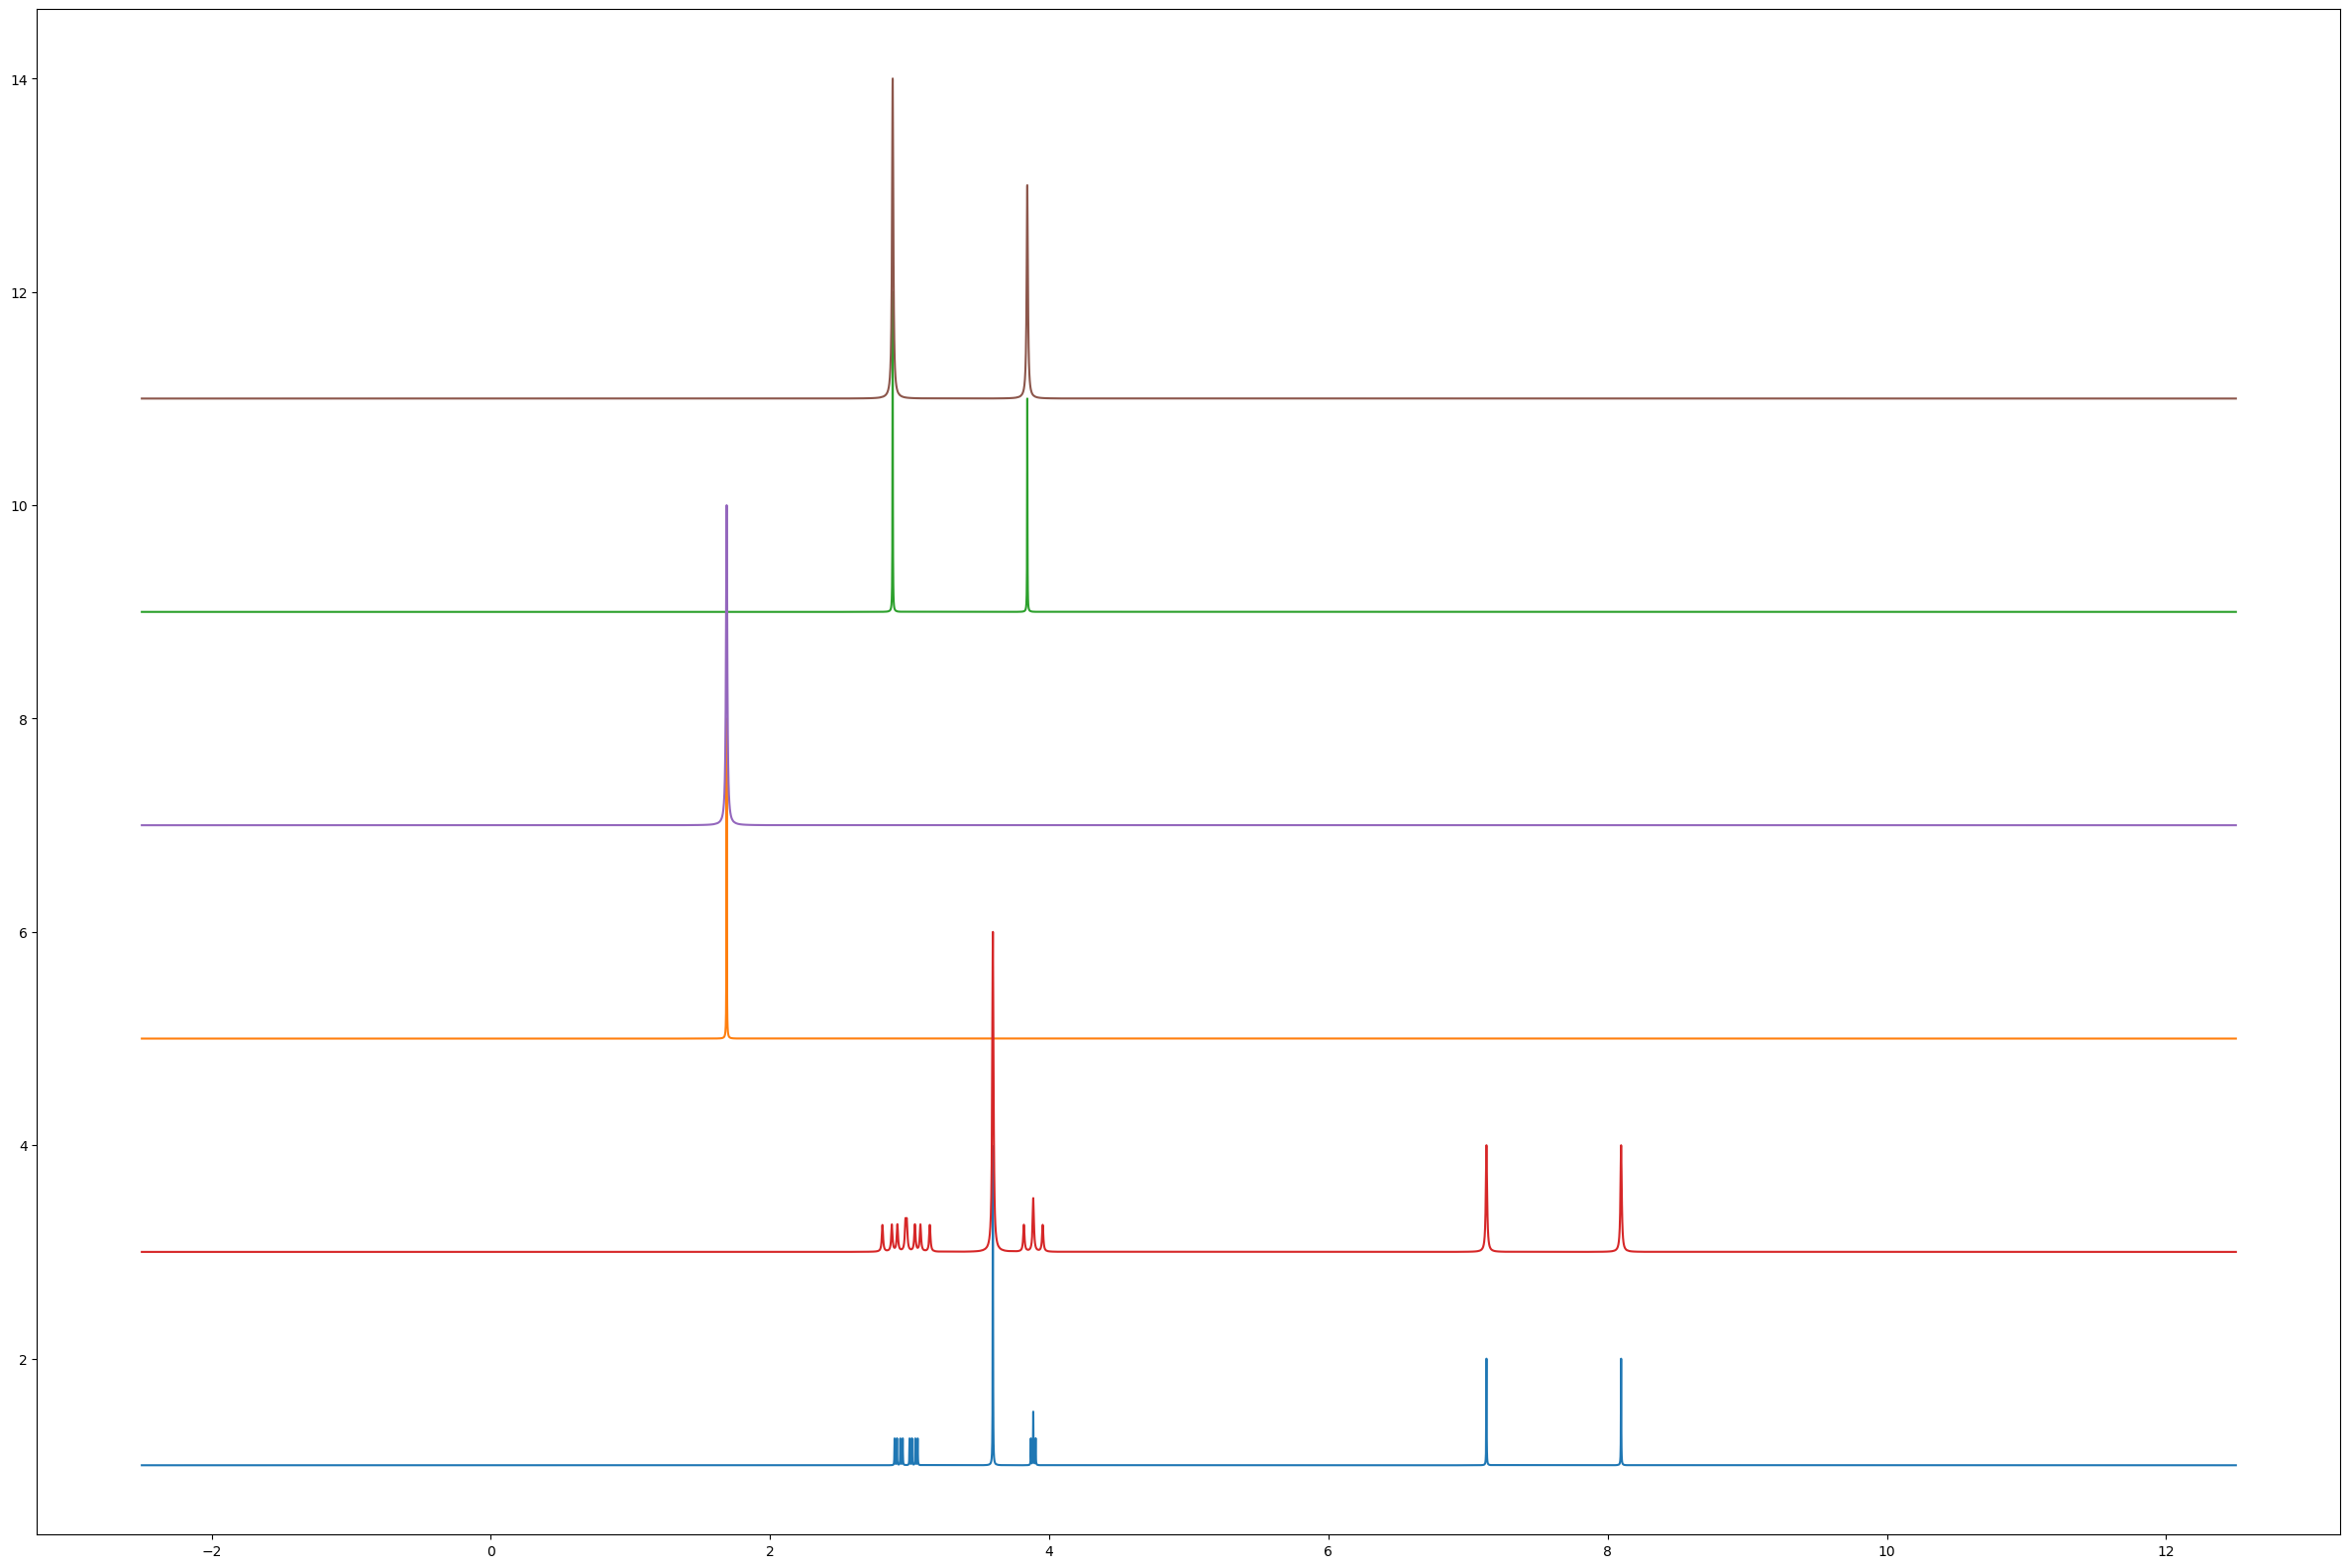

In [5]:
n = [1,5,9]
for i in np.arange(3):
    plt.plot(ppm_all, standardsSpec400[i] + n[i])


n = [3,7,11]
for i in np.arange(3):
    plt.plot(ppm_all, standardsSpec100[i] + n[i])


In [9]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (noise, baseline shift, peak shift, and random singlets and triplets) 

## The whole process is uniform between HF and LF except for the chemical shift placement of the random signals.

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra400 = []
spectra100 = []
conc = []
max_shift = 15
iterations = 10000

# Set a seed for reproducible data generation
np.random.seed(1)
random.seed(1)

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata400 = []
    xdata100 = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        shiftIntensity = np.random.uniform(-1,1)
        shift = np.random.choice([0,shiftIntensity*max_shift])
        shifted400 = ng.process.proc_base.cs(standardsSpec400[ii],shift)  #shift peaks
        shifted100 = ng.process.proc_base.cs(standardsSpec100[ii],shift)  #shift peaks
        concentration = np.random.uniform(1,50)
        scaled400 = concentration*shifted400 #scale the peak shifted spectra
        scaled100 = concentration*shifted100 #scale the peak shifted spectra
        xdata400.append(scaled400)  #add all shifted, scaled spectra to list
        xdata100.append(scaled100)  #add all shifted, scaled spectra to list
        ydata.append(concentration)  #add all concentrations to list
    xdata400 = np.array(xdata400).sum(axis=0) + v400*13.27  #sum all metabolite spectra and add maleic acid as reference
    xdata100 = np.array(xdata100).sum(axis=0) + v100*13.27  #sum all metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    

    # Select signal region and add random noise
    noiseIntensity = np.random.uniform(0.1,0.5)*0.05
    noise = np.random.normal(0, noiseIntensity,size = 46000)
    xdata400 = xdata400[10000:56000] + noise
    xdata100 = xdata100[10000:56000] + noise
    
    # Shift baseline up or down
    baseshift = np.random.uniform(-0.15,0.15)
    xdata400 = xdata400 + baseshift
    xdata100 = xdata100 + baseshift
    
    
    
    # Randomly add three singlet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Singlet400*intensity
    Sig1_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(2995)
        Sig1_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig1_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig1_100
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Singlet400*intensity
    Sig2_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig2_400 = np.zeros(2995)
        Sig2_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig2_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Singlet400*intensity
    Sig3_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig3_400 = np.zeros(2995)
        Sig3_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig3_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig3_100  
    
    
    # Randomly add three triplet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Triplet400*intensity
    Sig1_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(4231)
        Sig1_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig1_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig1_100
    
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Triplet400*intensity
    Sig2_100 = Triplet100*intensity
    if AddOrNot == 0:
        Sig2_400 = np.zeros(4231)
        Sig2_100 = np.zeros(4231)
    AddOrNot = random.choice([0,1])
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig2_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Triplet400*intensity
    Sig3_100 = Triplet100*intensity
    if AddOrNot == 0:
        Sig3_400 = np.zeros(4231)
        Sig3_100 = np.zeros(4231)
    AddOrNot = random.choice([0,1])
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig3_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig3_100
    
     # Append spectrum and metabolite profile variables to list
    spectra400.append(xdata400)
    spectra100.append(xdata100)
    conc.append(ydata) 
        
    


## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata400 = []
    xdata100 = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        shiftIntensity = np.random.uniform(-1,1)
        shift = np.random.choice([0,shiftIntensity*max_shift])
        shifted400 = ng.process.proc_base.cs(standardsSpec400[ii],shift)  #shift peaks
        shifted100 = ng.process.proc_base.cs(standardsSpec100[ii],shift)  #shift peaks
        concentration = np.random.uniform(1,50)
        LeaveOut = np.random.choice([0,1])
        scaled400 = concentration*shifted400*LeaveOut #scale the peak shifted spectra
        scaled100 = concentration*shifted100*LeaveOut #scale the peak shifted spectra
        xdata400.append(scaled400)  #add all shifted, scaled spectra to list
        xdata100.append(scaled100)  #add all shifted, scaled spectra to list
        ydata.append(concentration)  #add all concentrations to list
    xdata400 = np.array(xdata400).sum(axis=0) + v400*13.27  #sum all metabolite spectra and add maleic acid as reference
    xdata100 = np.array(xdata100).sum(axis=0) + v100*13.27  #sum all metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    

    # Select signal region and add random noise
    noiseIntensity = np.random.uniform(0.1,0.5)*0.05
    noise = np.random.normal(0, noiseIntensity,size = 46000)
    xdata400 = xdata400[10000:56000] + noise
    xdata100 = xdata100[10000:56000] + noise
    
    # Shift baseline up or down
    baseshift = np.random.uniform(-0.15,0.15)
    xdata400 = xdata400 + baseshift
    xdata100 = xdata100 + baseshift
    
    
    
    # Randomly add three singlet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Singlet400*intensity
    Sig1_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(2995)
        Sig1_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig1_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig1_100
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Singlet400*intensity
    Sig2_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig2_400 = np.zeros(2995)
        Sig2_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig2_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Singlet400*intensity
    Sig3_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig3_400 = np.zeros(2995)
        Sig3_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig3_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig3_100 
    
    
    # Randomly add three triplet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Triplet400*intensity
    Sig1_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(4231)
        Sig1_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig1_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig1_100
    
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Triplet400*intensity
    Sig2_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig2_400 = np.zeros(4231)
        Sig2_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig2_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Triplet400*intensity
    Sig3_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig3_400 = np.zeros(4231)
        Sig3_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig3_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig3_100
    
     # Append spectrum and metabolite profile variables to list
    spectra400.append(xdata400)
    spectra100.append(xdata100)
    conc.append(ydata) 
        
        
        
        
        
## Determine max values and scale all spectra
OvMaxL = []
for i in spectra400:
    OvMaxL.append(np.max(i))
OvMax400 = np.max(OvMaxL)
print(OvMax400)
spectra400 = spectra400/OvMax400


## Determine max values and scale all spectra
OvMaxL = []
for i in spectra100:
    OvMaxL.append(np.max(i))
OvMax100 = np.max(OvMaxL)
print(OvMax100)
spectra100 = spectra100/OvMax100


# Save the arrays to files, and save max value seen in training/testing datasets
np.save('Dataset21_400MHz_Spec.npy', spectra400)
np.save('Dataset21_100MHz_Spec.npy', spectra100)
np.save('Dataset21_Conc.npy', conc)
np.save("OvMax_400MHz_Dataset21", OvMax400)
np.save("OvMax_100MHz_Dataset21", OvMax100)

257.6387146571436
293.4792430287355


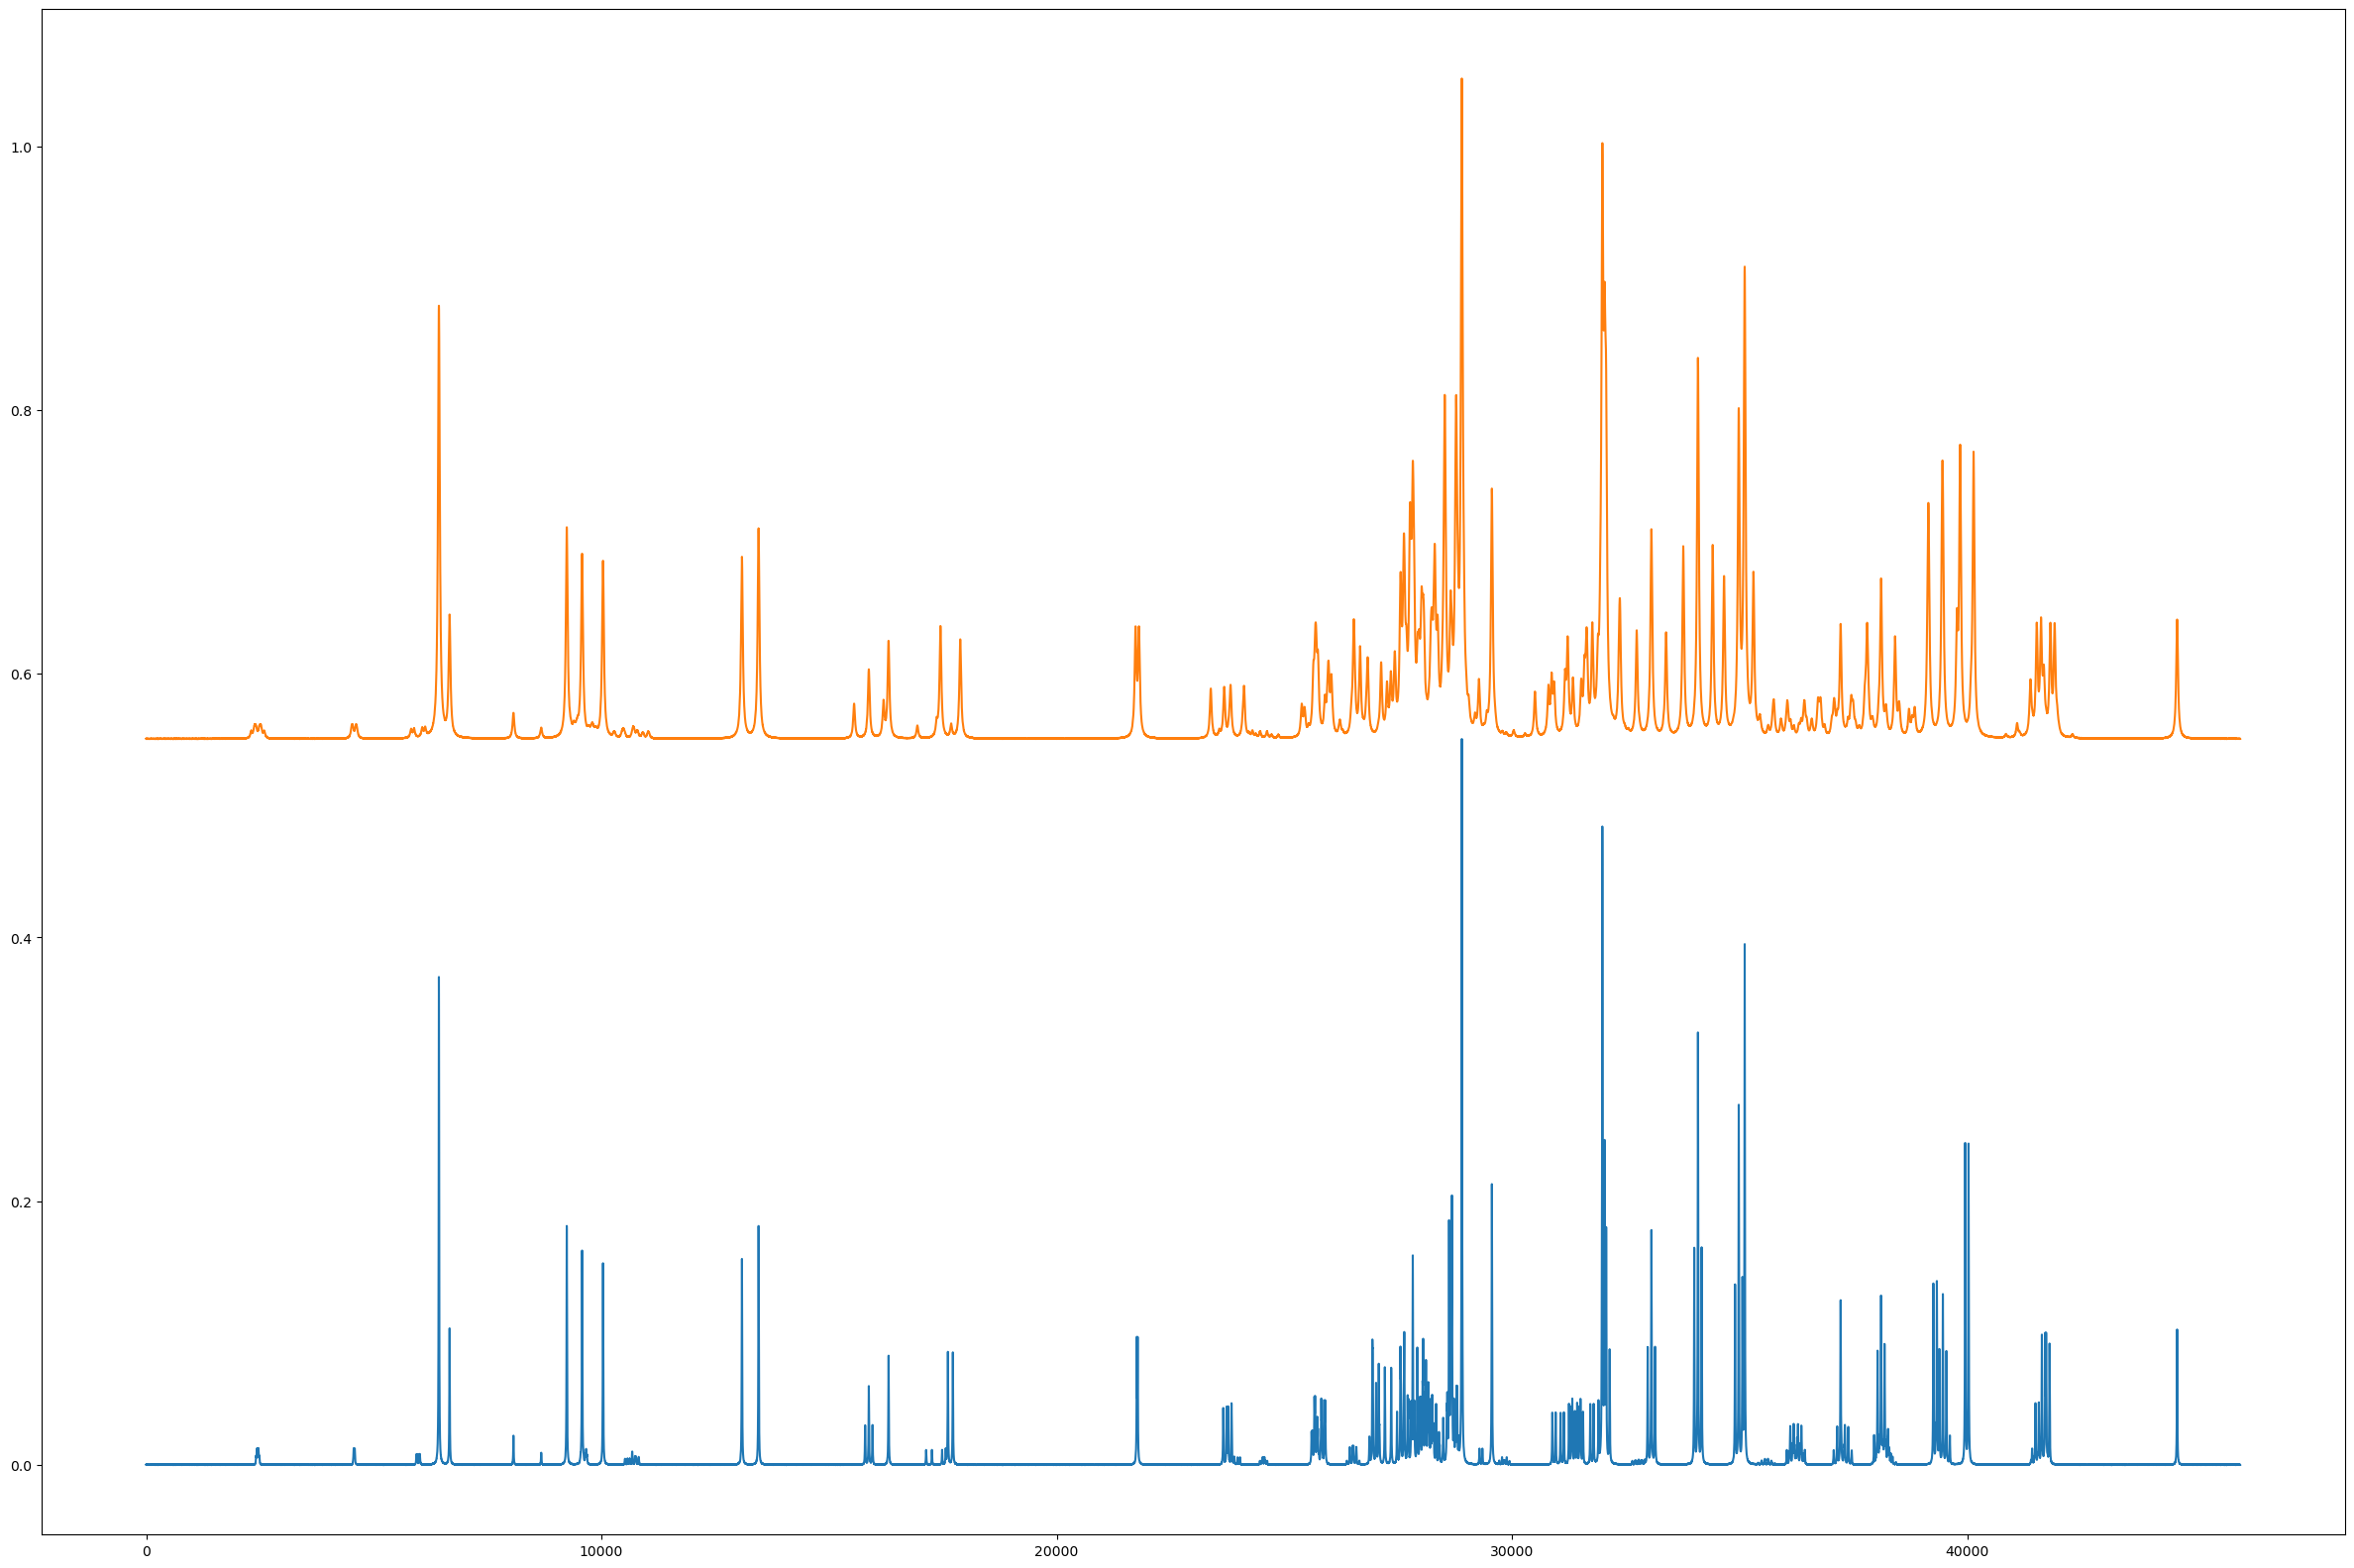

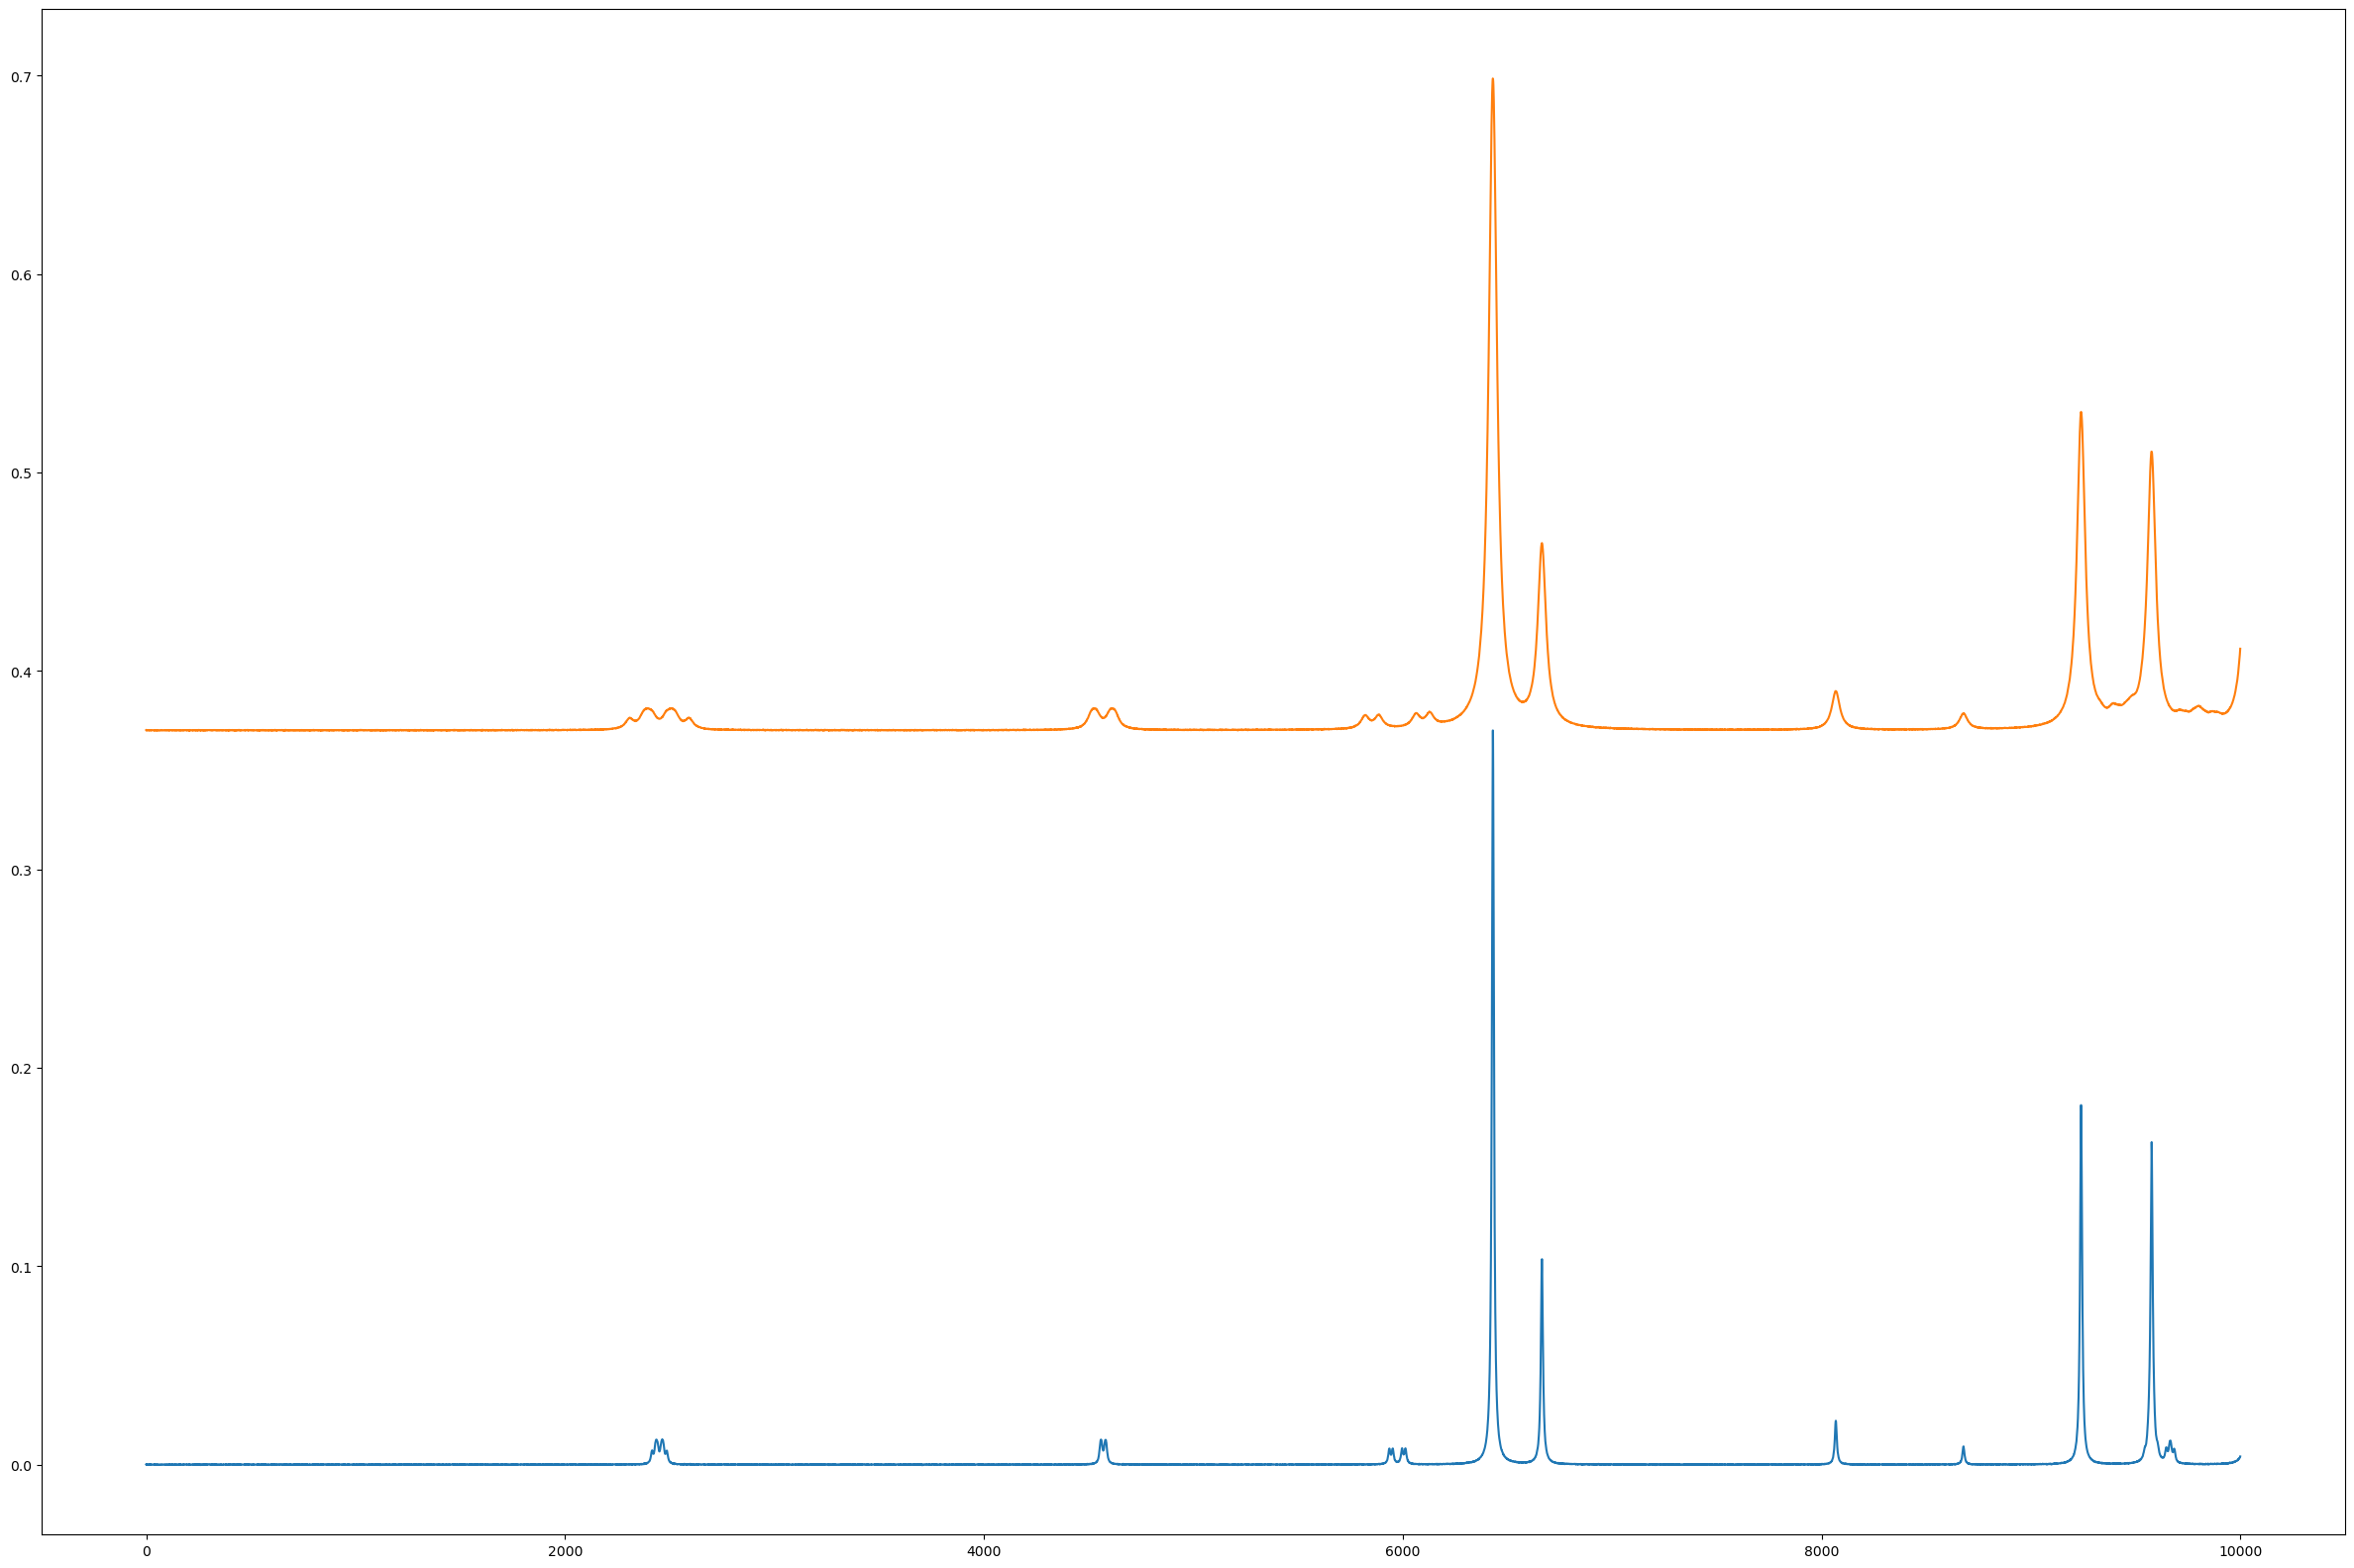

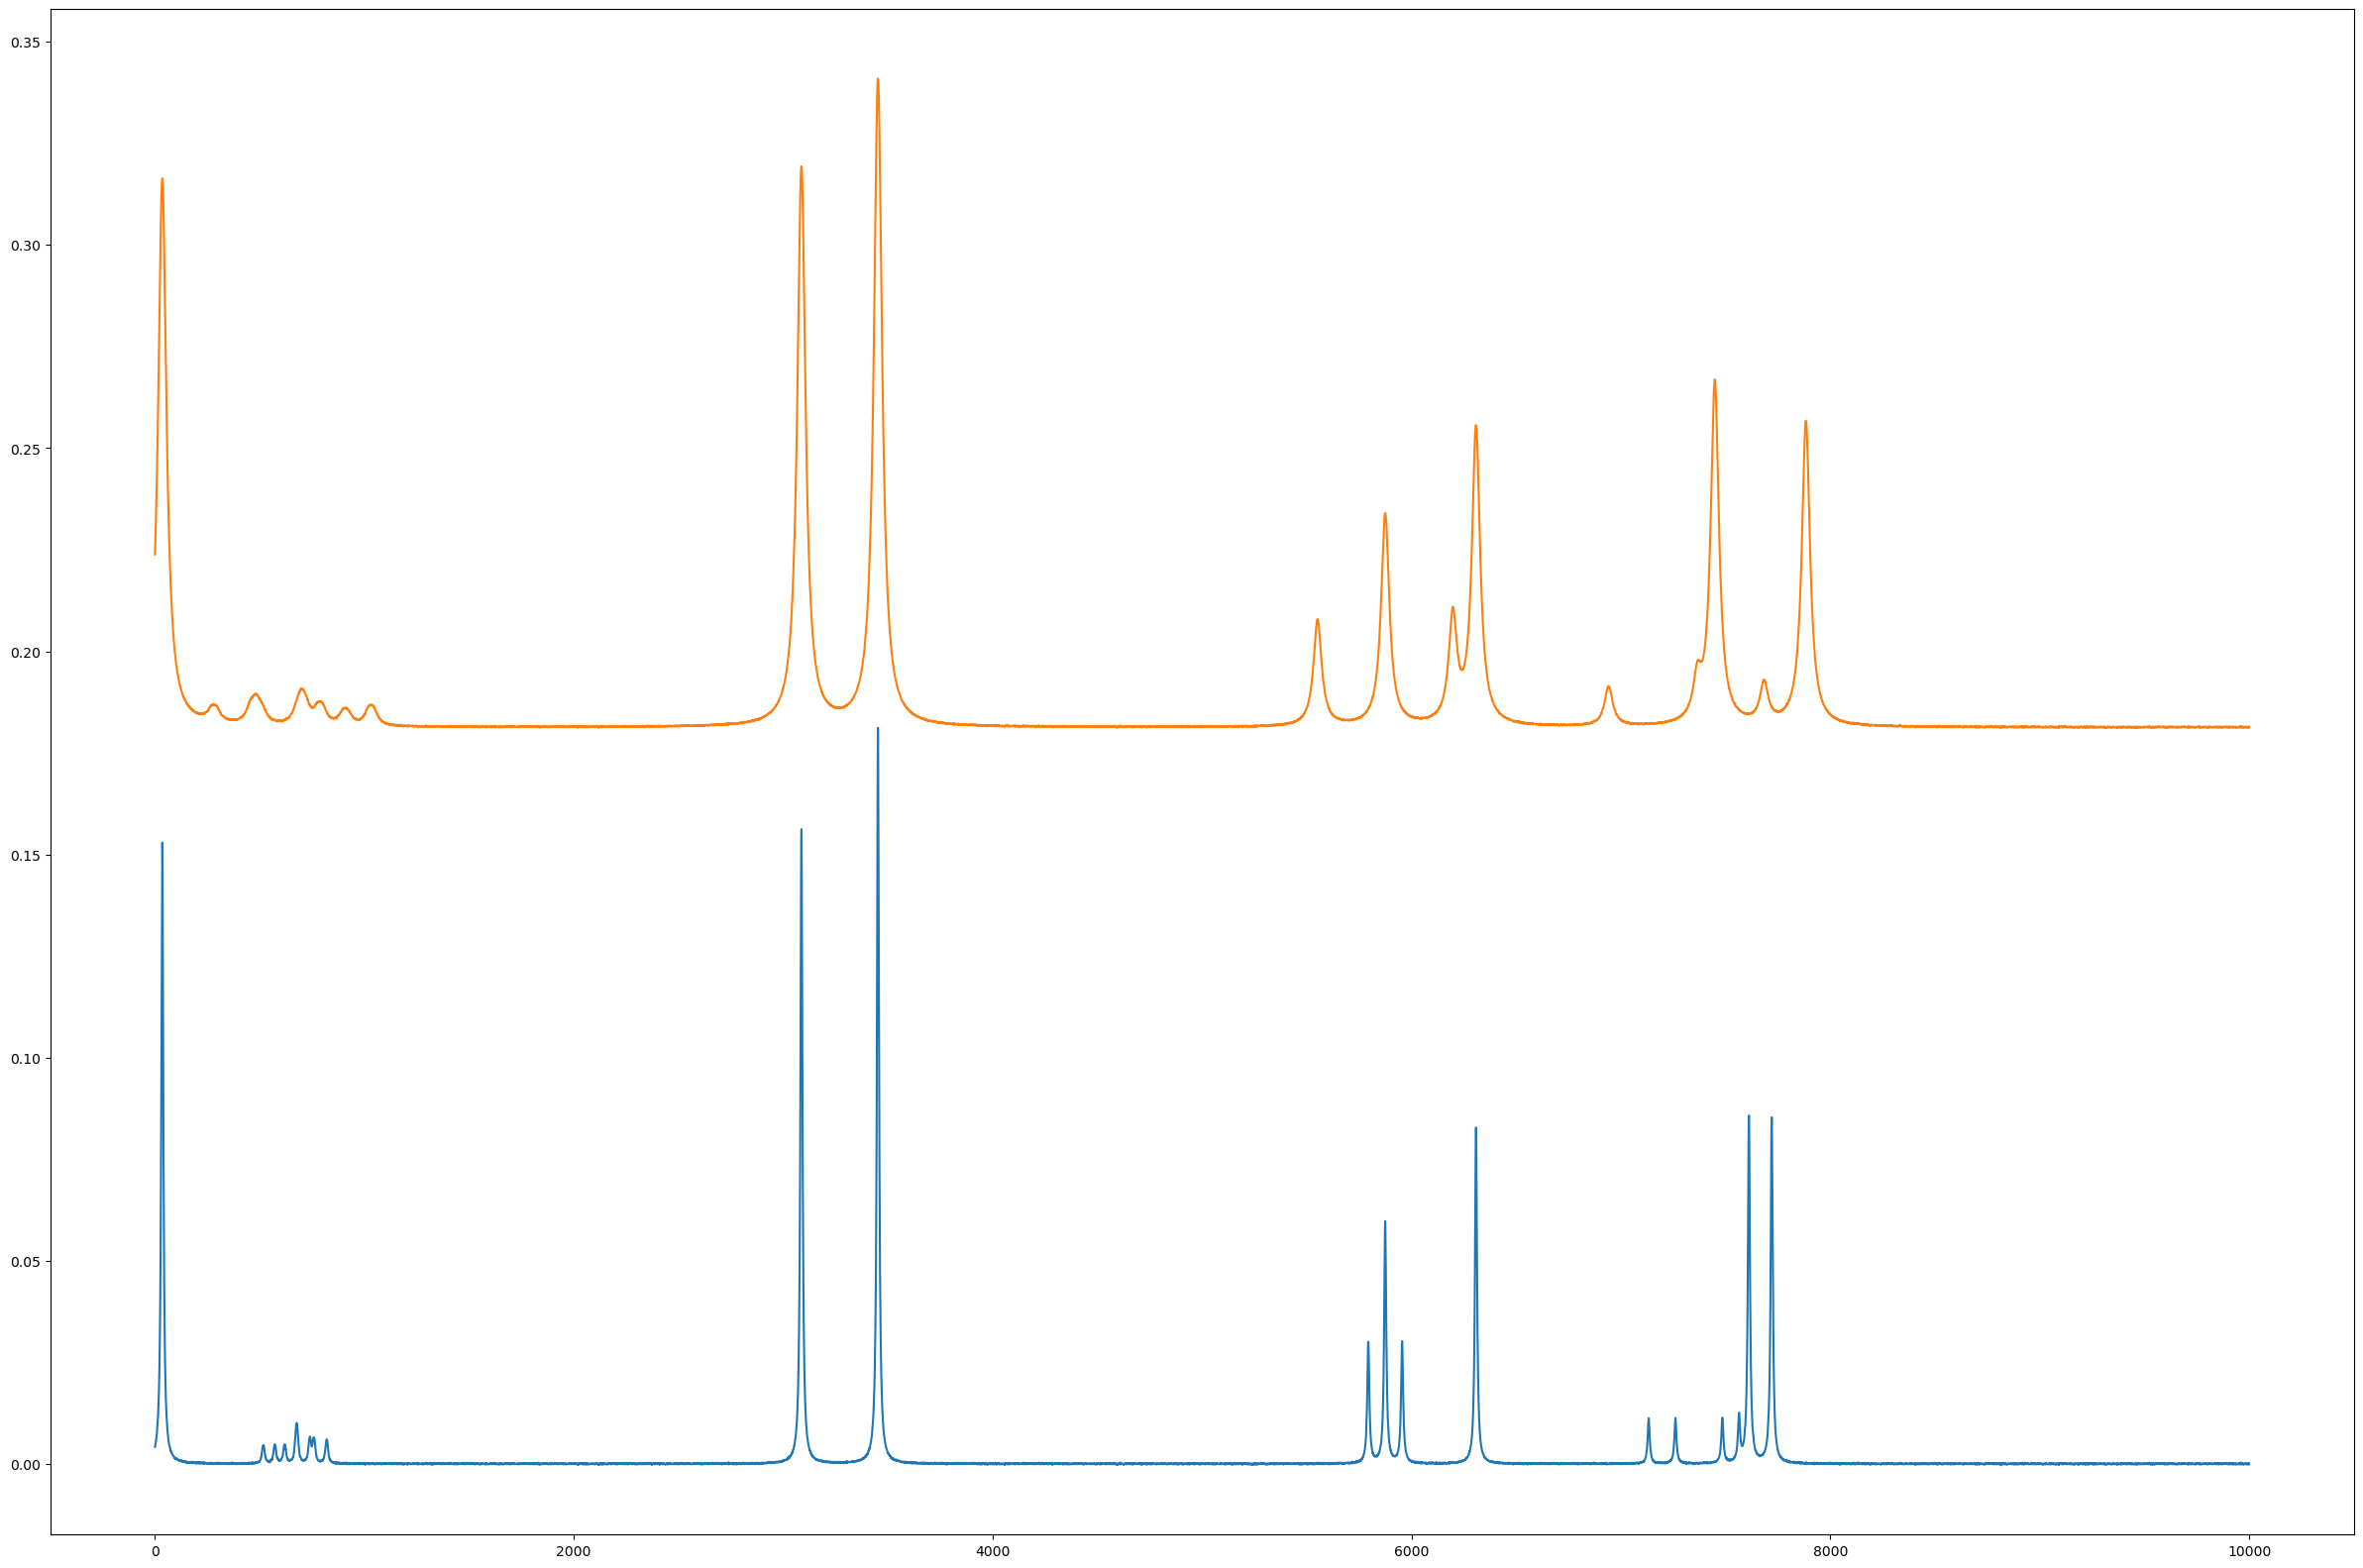

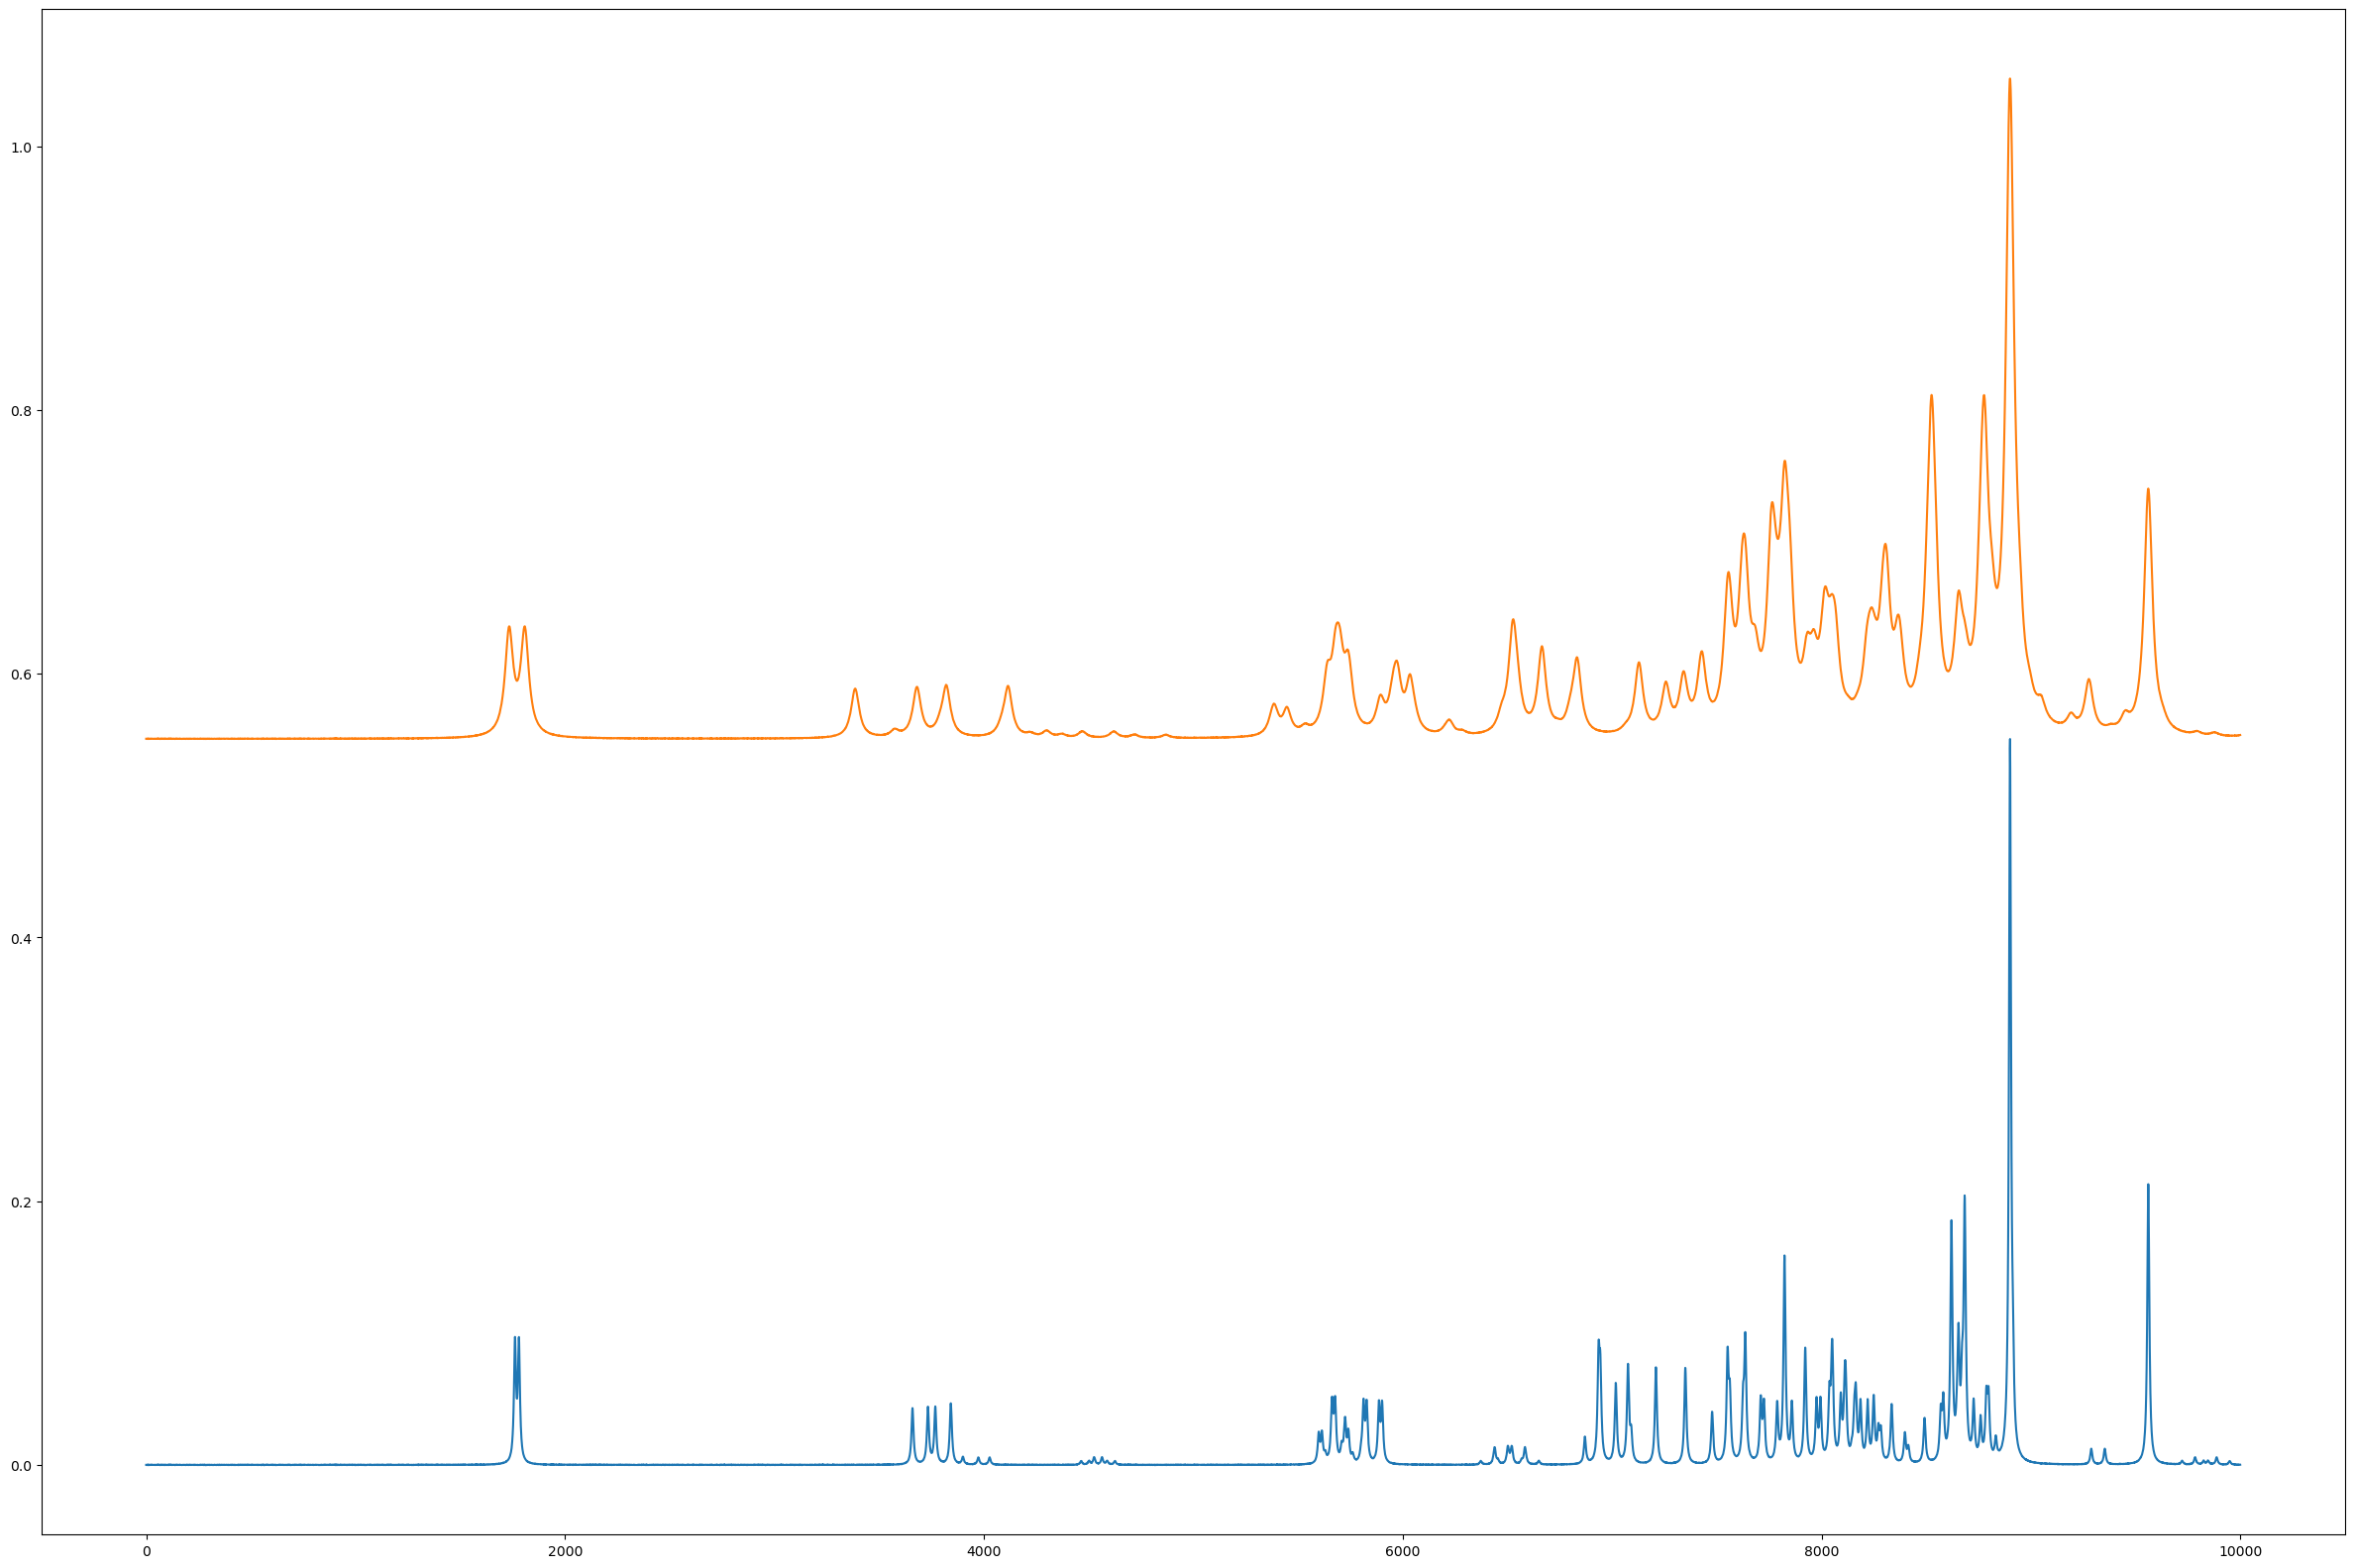

In [10]:
plt.plot(spectra400[0])
plt.plot(spectra100[0]+spectra400[0].max())

plt.show()

plt.plot(spectra400[0][:10000])
plt.plot(spectra100[0][:10000]+spectra400[0][:10000].max())

plt.show()

plt.plot(spectra400[0][10000:20000])
plt.plot(spectra100[0][10000:20000]+spectra400[0][10000:20000].max())

plt.show()

plt.plot(spectra400[0][20000:30000])
plt.plot(spectra100[0][20000:30000]+spectra400[0][20000:30000].max())

In [5]:
## A few parameters to report with data generation protocol

BaseShiftMax = 0.15
NoiseAmplitudeMaxSD = 0.025
MaxDMSO2Amplitude = 13.27*v400.max()

BaseShiftPercent = 100 * (BaseShiftMax / MaxDMSO2Amplitude)
NoiseAmplitudeSDPercent = 100 * (NoiseAmplitudeMaxSD / MaxDMSO2Amplitude)

print(BaseShiftPercent)
print(NoiseAmplitudeSDPercent)


0.567550461075138
0.094591743512523


In [13]:
## A few parameters to report with data generation protocol

BaseShiftMax = 0.15
NoiseAmplitudeMaxSD = 0.025
MaxDMSO2Amplitude = v100.max()

BaseShiftPercent = 100 * (BaseShiftMax / MaxDMSO2Amplitude)
NoiseAmplitudeSDPercent = 100 * (NoiseAmplitudeMaxSD / MaxDMSO2Amplitude)

print(BaseShiftPercent)
print(NoiseAmplitudeSDPercent)

7.501961763001025
1.250326960500171


In [6]:
# These are used because there were max before accidentally regenerating training data....
OvMax400 = 289.2299622987939
OvMax100 = 285.28978521714555


## Generate validation dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra100 = []
spectra400 = []
conc = []
max_shift = 15
iterations = 5000

# Set a seed for reproducible data generation
np.random.seed(2)
random.seed(2)

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata400 = []
    xdata100 = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        shiftIntensity = np.random.uniform(-1,1) 
        shifted400 = ng.process.proc_base.cs(standardsSpec400[ii],np.random.choice([0,shiftIntensity*max_shift]))  #shift peaks
        shifted100 = ng.process.proc_base.cs(standardsSpec100[ii],np.random.choice([0,shiftIntensity*max_shift]))  #shift peaks
        concentration = np.random.uniform(1,50)
        scaled400 = concentration*shifted400 #scale the peak shifted spectra
        scaled100 = concentration*shifted100 #scale the peak shifted spectra
        xdata400.append(scaled400)  #add all shifted, scaled spectra to list
        xdata100.append(scaled100)  #add all shifted, scaled spectra to list
        ydata.append(concentration)  #add all concentrations to list
    xdata400 = np.array(xdata400).sum(axis=0) + v400*13.27  #sum all metabolite spectra and add maleic acid as reference
    xdata100 = np.array(xdata100).sum(axis=0) + v100*13.27  #sum all metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    
    # Select signal region and add random noise
    noiseIntensity = np.random.uniform(0.1,0.5)*0.05
    noise = np.random.normal(0, noiseIntensity,size = 46000)
    xdata400 = xdata400[10000:56000] + noise
    xdata100 = xdata100[10000:56000] + noise
    
    # Shift baseline up or down
    baseShiftIntensity = np.random.uniform(-0.15,0.15)
    xdata400 = xdata400 + baseShiftIntensity
    xdata100 = xdata100 + baseShiftIntensity
    
    
    # Randomly add three singlet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Singlet400*intensity
    Sig1_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(2995)
        Sig1_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig1_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig1_100
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Singlet400*intensity
    Sig2_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig2_400 = np.zeros(2995)
        Sig2_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig2_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Singlet400*intensity
    Sig3_100 = Singlet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig3_400 = np.zeros(2995)
        Sig3_100 = np.zeros(2995)
    region = random.choice(np.arange(46000-2995))
    xdata400[region:region+2995] = xdata400[region:region+2995] + Sig3_400
    xdata100[region:region+2995] = xdata100[region:region+2995] + Sig3_100
    
    
    # Randomly add three triplet signals
    intensity = np.random.uniform(1,50)
    Sig1_400 = Triplet400*intensity
    Sig1_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig1_400 = np.zeros(4231)
        Sig1_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig1_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig1_100
    
    
    intensity = np.random.uniform(1,50)
    Sig2_400 = Triplet400*intensity
    Sig2_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig2_400 = np.zeros(4231)
        Sig2_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig2_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig2_100
    
    intensity = np.random.uniform(1,50)
    Sig3_400 = Triplet400*intensity
    Sig3_100 = Triplet100*intensity
    AddOrNot = random.choice([0,1])
    if AddOrNot == 0:
        Sig3_400 = np.zeros(4231)
        Sig3_100 = np.zeros(4231)
    region = random.choice(np.arange(46000-4231))
    xdata400[region:region+4231] = xdata400[region:region+4231] + Sig3_400
    xdata100[region:region+4231] = xdata100[region:region+4231] + Sig3_100
    
    # Append spectrum and metabolite profile variables to list
    spectra400.append(xdata400/OvMax400)
    spectra100.append(xdata100/OvMax100)
    conc.append(ydata) 



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('Dataset21_400MHz_Val_Spec.npy', spectra400)
np.save('Dataset21_100MHz_Val_Spec.npy', spectra100)
np.save('Dataset21_Val_Conc.npy', conc)

#### Now generate some representative input spectra with up to 21 metabolites

In [7]:
# These are what was used before accidentally regenerating the training data
OvMax400 = 289.2299622987939
OvMax100 = 285.28978521714555

In [8]:
## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc400(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])+np.random.normal(0,0.3*0.05,65536)
    spectrum = spectrum[:,10000:56000]/OvMax400
    return spectrum

## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc100(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])+np.random.normal(0,0.3*0.05,65536)
    spectrum = spectrum[:,10000:56000]/OvMax100
    return spectrum

In [9]:
## Create validation examples at 400-MHz


# Create variable with the trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v400 + standardsSpec400.sum(axis=0)
AllAq1 = spec_proc400(AllAq1)
AllAq1_c = np.zeros(21)+1



# Create variable with the trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v400 +25*standardsSpec400.sum(axis=0) 
AllAq25 = spec_proc400(AllAq25)
AllAq25_c = np.zeros(21)+25


# Create variable with the trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v400 +5*standardsSpec400.sum(axis=0)
AllAq5 = spec_proc400(AllAq5)
AllAq5_c = np.zeros(21)+5



## Create variable with the trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v400 +50*standardsSpec400.sum(axis=0)
AllAq50 = spec_proc400(AllAq50)
AllAq50_c = np.zeros(21)+50




# Create variable with the trained metabolites (@25mM), but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v400 +25*standardsSpec400.sum(axis=0)
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,9000:55000])
ShiftedSpec = ShiftedSpec/OvMax400
ShiftedSpec_c = np.zeros(21)+25



## Create variable with the trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v400  +25*standardsSpec400.sum(axis=0)
SineBase = spec_proc400(SineBase)
time = np.arange(0, 46000, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(21)+25



# Create a "blank"
Blank = np.zeros(46000)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,46000])
Blank = Blank+13.27*v400[10000:56000]+np.random.normal(0,0.3*0.05,46000)
Blank = Blank/OvMax400







# Create variable with the trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v400+ 25*standardsSpec400.sum(axis=0)
ThreeAddedSinglets = spec_proc400(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = Singlet400*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax400
    
r5 = np.random.uniform(1,50)
Sig2 = Singlet400*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax400
    
r7 = np.random.uniform(1,50)
Sig3 = Singlet400*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax400

ThreeAddedSinglets_c = np.zeros(21)+25




# Create variable with the trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v400+ 25*standardsSpec400.sum(axis=0)
ThirtyAddedSinglets = spec_proc400(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet400*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(46000-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax400
    
ThirtyAddedSinglets_c = np.zeros(21) + 25





# Create variable with the trained metabolites alternating between 1 and 50 mM (high dynamic range signal)
x = 21  # Number of metabolites
AllAq_HD_c = np.tile([1, 50], x // 2 + 1)[:x]
AllAq_HD = 13.27*v400 + AllAq_HD_c[:, np.newaxis]*standardsSpec400
AllAq_HD = spec_proc400(AllAq_HD.sum(axis=0))


# Create variable with the trained metabolites alternating between 0 and 50 mM (see how zero is handled)
x = 21  # Number of metabolites
AllAq_HalfZero_c = np.tile([0, 50], x // 2 + 1)[:x]
AllAq_HalfZero = 13.27*v400 + AllAq_HalfZero_c[:, np.newaxis]*standardsSpec400
AllAq_HalfZero = spec_proc400(AllAq_HalfZero.sum(axis=0))


In [10]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, ThreeAddedSinglets, ThirtyAddedSinglets, ShiftedSpec, SineBase, AllAq_HD, AllAq_HalfZero, Blank])
ValConc = np.array([AllAq1_c, AllAq5_c, AllAq25_c, AllAq50_c, ThreeAddedSinglets_c, ThirtyAddedSinglets_c, ShiftedSpec_c, SineBase_c, AllAq_HD_c, AllAq_HalfZero_c, np.zeros(21)])
ValSpecNames = np.array(['AllAq1', 'AllAq5', 'AllAq25', 'AllAq50', 'ThreeAddedSinglets', 'ThirtyAddedSinglets', 'ShiftedSpec', 'SineBase', 'HighDynamicRange', 'HalfZeros', 'Blank'])

# Save each array
np.save("Dataset21_400MHz_RepresentativeExamples_Spectra", ValSpectra)
np.save("Dataset21_RepresentativeExamples_Concentrations", ValConc)
np.save("Dataset21_RepresentativeExamples_VariableNames", ValSpecNames)

In [11]:
## Create validation examples at 100-MHz


# Create variable with the trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v100 + standardsSpec100.sum(axis=0)
AllAq1 = spec_proc100(AllAq1)
AllAq1_c = np.zeros(21)+1



# Create variable with the trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v100 +25*standardsSpec100.sum(axis=0) 
AllAq25 = spec_proc100(AllAq25)
AllAq25_c = np.zeros(21)+25


# Create variable with the trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v100 +5*standardsSpec100.sum(axis=0)
AllAq5 = spec_proc100(AllAq5)
AllAq5_c = np.zeros(21)+5



## Create variable with the trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v100 +50*standardsSpec100.sum(axis=0)
AllAq50 = spec_proc100(AllAq50)
AllAq50_c = np.zeros(21)+50




# Create variable with the trained metabolites (@25mM), but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v100 +25*standardsSpec100.sum(axis=0)
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,9000:55000])
ShiftedSpec = ShiftedSpec/OvMax100
ShiftedSpec_c = np.zeros(21)+25



## Create variable with the trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v100  +25*standardsSpec100.sum(axis=0)
SineBase = spec_proc100(SineBase)
time = np.arange(0, 46000, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(21)+25



# Create a "blank"
Blank = np.zeros(46000)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,46000])
Blank = Blank+13.27*v100[10000:56000]+np.random.normal(0,0.3*0.05,46000)
Blank = Blank/OvMax100







# Create variable with the trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v100+ 25*standardsSpec100.sum(axis=0)
ThreeAddedSinglets = spec_proc100(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = Singlet100*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax100
    
r5 = np.random.uniform(1,50)
Sig2 = Singlet100*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax100
    
r7 = np.random.uniform(1,50)
Sig3 = Singlet100*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax100

ThreeAddedSinglets_c = np.zeros(21)+25




# Create variable with the trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v100+ 25*standardsSpec100.sum(axis=0)
ThirtyAddedSinglets = spec_proc100(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet100*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(46000-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax100
    
ThirtyAddedSinglets_c = np.zeros(21) + 25





# Create variable with the trained metabolites alternating between 1 and 50 mM (high dynamic range signal)
x = 21  # Number of metabolites
AllAq_HD_c = np.tile([1, 50], x // 2 + 1)[:x]
AllAq_HD = 13.27*v100 + AllAq_HD_c[:, np.newaxis]*standardsSpec100
AllAq_HD = spec_proc100(AllAq_HD.sum(axis=0))


# Create variable with the trained metabolites alternating between 0 and 50 mM (see how zero is handled)
x = 21  # Number of metabolites
AllAq_HalfZero_c = np.tile([0, 50], x // 2 + 1)[:x]
AllAq_HalfZero = 13.27*v100 + AllAq_HalfZero_c[:, np.newaxis]*standardsSpec100
AllAq_HalfZero = spec_proc100(AllAq_HalfZero.sum(axis=0))


In [12]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, ThreeAddedSinglets, ThirtyAddedSinglets, ShiftedSpec, SineBase, AllAq_HD, AllAq_HalfZero, Blank])

# Save array
np.save("Dataset21_100MHz_RepresentativeExamples_Spectra", ValSpectra)

### Generate validation data with 12 metabolites not seen in training

In [6]:
## Read in simulated spectra of metabolites downloaded from HMDB. And create singlet and triplets to add at random.


## First for 400-MHz data
# First load quantitative reference
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/400/')  # Switch to appropriate folders and load data
vd400, v400 = ng.jcampdx.read('HMDB0000176_142710_predicted_H_400.jdx') # maleic acid, our quantitative reference
v400 = ng.process.proc_base.cs(v400, 28305)  # Shift maleic acid peak to 0 ppm to simulate a TSP peak (need to find good simulated TSP peak)

# Load spectra of simulated standards to be analytes
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/400test/')  # Switch to appropriate folders and load data
filenames400 = os.listdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/400test')  # Get a list of filenames in the directory
filenames400 = sorted(filenames400)
standardsSpec400 =[]  # initialize variable to hold spectra of standards
standardsDictionary400 = []  # initialize variable to hold dictionaries of spectra of standards
for i in np.arange(len(filenames400)):
    dic, data = ng.jcampdx.read(filenames400[i])
    standardsSpec400.append(data)
    standardsDictionary400.append(dic)
standardsSpec400 = np.array(standardsSpec400)  

## Generate a singlet and tripelet at 400-MHz
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/400/')  # Switch to appropriate folders and load data
#Singlet
sing_d400, sing400 = ng.jcampdx.read('HMDB0000042_5433_predicted_H_400.jdx') # acetic acid, for adding random singlets
Singlet400 = sing400[sing400 != 0]  # make variable of acetic acid without zeros
#Triplet
trip_d400, trip400 = ng.jcampdx.read('HMDB0000254_143210_predicted_H_400.jdx') 
Triplet400 = trip400[trip400 != 0]  # make variable of succinate (although true signal is singlet, not triplet) without zeros





## Repeat for 100-MHz data
# First load quantitative reference
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/100/')  # Switch to appropriate folders and load data
vd100, v100 = ng.jcampdx.read('HMDB0000176_142710_predicted_H_100.jdx') # maleic acid, our quantitative reference
v100 = ng.process.proc_base.cs(v100, 28305)  # Shift maleic acid peak to 0 ppm to simulate a TSP peak (need to find good simulated TSP peak)

# Load spectra of simulated standards to be analytes
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/100test/')  # Switch to appropriate folders and load data
filenames100 = os.listdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/100test')  # Get a list of filenames in the directory
filenames100 = sorted(filenames100)
standardsSpec100 =[]  # initialize variable to hold spectra of standards
standardsDictionary100 = []  # initialize variable to hold dictionaries of spectra of standards
for i in np.arange(len(filenames100)):
    dic, data = ng.jcampdx.read(filenames100[i])
    standardsSpec100.append(data)
    standardsDictionary100.append(dic)
standardsSpec100 = np.array(standardsSpec100)  

## Generate a singlet and tripelet at 100-MHz
os.chdir('/home/htjhnson/Desktop/LF_to_HF/HMDB/100/')  # Switch to appropriate folders and load data
#Singlet generation
sing_d100, sing100 = ng.jcampdx.read('HMDB0000042_5433_predicted_H_100.jdx') # acetic acid, for adding random singlets
Singlet100 = sing100[sing100 != 0]  # make variable of acetic acid without zeros
Singlet100 = Singlet100[4503:7498] # make variable smaller as it extends very far (hopefully this isn't a mistake that affects accuracy...) Made it same size as 400-MHz signal for consistentent placement.
#Triplet genertation
trip_d100, trip100 = ng.jcampdx.read('HMDB0000254_143210_predicted_H_100.jdx') 
Triplet100 = trip100[trip100 != 0]  # make variable of succinate (although true signal is singlet, not triplet) without zeros
Triplet100 = Triplet100[6345:-6345] # make variable smaller as it extends very far (hopefully this isn't a mistake that affects accuracy...) Made it same size as 400-MHz signal for consistentent placement.



## Create ppm scale for plotting ppm rather than just data point numbers for x-axis
ppm_all = (np.linspace(12.5, -2.5, 65536))
ppm = ppm_all[10000:56000]

In [7]:
OvMax400 = 289.2299622987939
OvMax100 = 285.28978521714555

In [8]:
## Generate validation dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra100 = []
spectra400 = []
conc = []
max_shift = 15
iterations = 50

# Set a seed for reproducible data generation
np.random.seed(2)
random.seed(2)

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata400 = []
    xdata100 = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(12):
        shiftIntensity = np.random.uniform(-1,1) 
        shifted400 = ng.process.proc_base.cs(standardsSpec400[ii],np.random.choice([0,shiftIntensity*max_shift]))  #shift peaks
        shifted100 = ng.process.proc_base.cs(standardsSpec100[ii],np.random.choice([0,shiftIntensity*max_shift]))  #shift peaks
        concentration = np.random.uniform(1,50)
        scaled400 = concentration*shifted400 #scale the peak shifted spectra
        scaled100 = concentration*shifted100 #scale the peak shifted spectra
        xdata400.append(scaled400)  #add all shifted, scaled spectra to list
        xdata100.append(scaled100)  #add all shifted, scaled spectra to list
        ydata.append(concentration)  #add all concentrations to list
    xdata400 = np.array(xdata400).sum(axis=0) + v400*13.27  #sum all metabolite spectra and add maleic acid as reference
    xdata100 = np.array(xdata100).sum(axis=0) + v100*13.27  #sum all metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    
    # Select signal region and add random noise
    noiseIntensity = np.random.uniform(0.1,0.5)*0.05
    noise = np.random.normal(0, noiseIntensity,size = 46000)
    xdata400 = xdata400[10000:56000] + noise
    xdata100 = xdata100[10000:56000] + noise
    

    # Append spectrum and metabolite profile variables to list
    spectra400.append(xdata400/OvMax400)
    spectra100.append(xdata100/OvMax100)
    conc.append(ydata) 



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('Dataset21_Other12Met_400MHz_Val_Spec.npy', spectra400)
np.save('Dataset21_Other12Met_100MHz_Val_Spec.npy', spectra100)
np.save('Dataset21_Other12Met_Val_Conc.npy', conc)

# Generate datasets for quantification (tried previous dataset but results were poor, some error related to concentration definition?)

In [6]:
OvMax400 = 289.2299622987939
OvMax100 = 285.28978521714555

In [31]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra = []
conc = []
max_shift = 15
iterations = 10000

# Set a seed for reproducible data generation
np.random.seed(1)
random.seed(1)

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        rr1 = np.random.uniform(-1,1) 
        shifted = ng.process.proc_base.cs(standardsSpec400[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        rr2 = np.random.uniform(1,50)
        scaled = rr2*shifted #scale the peak shifted spectra
        c = rr2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v400*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[10000:56000]+np.random.normal(0, r4,size = 46000)
    
    # Shift baseline up or down
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    
    # Randomly add up to  three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet400*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(46000-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = Singlet400*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(46000-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = Singlet400*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(46000-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc.append(ydata) 
        
    


## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        rr1 = np.random.uniform(-1,1) 
        shifted = ng.process.proc_base.cs(standardsSpec400[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        rr2 = np.random.uniform(1,50)
        rr3 = np.random.choice([0,1])
        scaled = rr2*rr3*shifted #scale the peak shifted spectra
        c = rr2*rr3  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v400*13.27 
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[10000:56000]+np.random.normal(0, r4,size = 46000)
    
    # Shift baseline up or down
    xdata = xdata + np.random.uniform(-0.15,0.15)

    
    # Randomly add up to three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet400*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(46000-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = Singlet400*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(46000-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = Singlet400*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(46000-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3

    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc.append(ydata)         
        
        
        

spectra = np.array(spectra)/OvMax400



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('Dataset21_400MHz_Spec_ForQuant.npy', spectra)
np.save('Dataset21_400MHz_Conc_ForQuant.npy', conc)

In [33]:
## A few parameters to report with data generation protocol

BaseShiftMax = 0.15
NoiseAmplitudeMaxSD = 0.025
MaxDMSO2Amplitude = v400.max()

BaseShiftPercent = 100 * (BaseShiftMax / MaxDMSO2Amplitude)
NoiseAmplitudeSDPercent = 100 * (NoiseAmplitudeMaxSD / MaxDMSO2Amplitude)

print(BaseShiftPercent)
print(NoiseAmplitudeSDPercent)

7.53139461846708
1.2552324364111802


In [36]:
## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])+np.random.normal(0,0.3*0.05,65536)
    spectrum = spectrum[:,10000:56000]/OvMax400
    return spectrum


## Create validation examples


# Create variable with the 10 trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v400 + standardsSpec400.sum(axis=0)
AllAq1 = spec_proc(AllAq1)
AllAq1_c = np.zeros(21)+1



# Create variable with the 10 trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v400 +25*standardsSpec400.sum(axis=0) 
AllAq25 = spec_proc(AllAq25)
AllAq25_c = np.zeros(21)+25


# Create variable with the 10 trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v400 +5*standardsSpec400.sum(axis=0)
AllAq5 = spec_proc(AllAq5)
AllAq5_c = np.zeros(21)+5



## Create variable with the 10 trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v400 +50*standardsSpec400.sum(axis=0)
AllAq50 = spec_proc(AllAq50)
AllAq50_c = np.zeros(21)+50




# Create variable with the 10 trained metabolites (@25mM), but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v400 +25*standardsSpec400.sum(axis=0)
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,9000:55000])
ShiftedSpec = ShiftedSpec/OvMax400
ShiftedSpec_c = np.zeros(21)+25



## Create variable with the 10 trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v400  +25*standardsSpec400.sum(axis=0)
SineBase = spec_proc(SineBase)
time = np.arange(0, 46000, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(21)+25



# Create a "blank"
Blank = np.zeros(46000)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,46000])
Blank = Blank+13.27*v400[10000:56000]+np.random.normal(0,0.3*0.05,46000)
Blank = Blank/OvMax400







# Create variable with the 10 trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v400+ 25*standardsSpec400.sum(axis=0)
ThreeAddedSinglets = spec_proc(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = Singlet400*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax400
    
r5 = np.random.uniform(1,50)
Sig2 = Singlet400*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax400
    
r7 = np.random.uniform(1,50)
Sig3 = Singlet400*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax400

ThreeAddedSinglets_c = np.zeros(21)+25




# Create variable with the 8 trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v400+ 25*standardsSpec400.sum(axis=0)
ThirtyAddedSinglets = spec_proc(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet400*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(46000-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax400
    
ThirtyAddedSinglets_c = np.zeros(21) + 25





# Create variable with the 8 trained metabolites alternating between 1 and 50 mM (high dynamic range signal)
x = 21  # Number of metabolites
AllAq_HD_c = np.tile([1, 50], x // 2 + 1)[:x]
AllAq_HD = 13.27*v400 + AllAq_HD_c[:, np.newaxis]*standardsSpec400
AllAq_HD = spec_proc(AllAq_HD.sum(axis=0))


# Create variable with the 8 trained metabolites alternating between 0 and 50 mM (see how zero is handled)
x = 21  # Number of metabolites
AllAq_HalfZero_c = np.tile([0, 50], x // 2 + 1)[:x]
AllAq_HalfZero = 13.27*v400 + AllAq_HalfZero_c[:, np.newaxis]*standardsSpec400
AllAq_HalfZero = spec_proc(AllAq_HalfZero.sum(axis=0))

In [39]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, ThreeAddedSinglets, ThirtyAddedSinglets, ShiftedSpec, SineBase, AllAq_HD, AllAq_HalfZero, Blank])
ValConc = np.array([AllAq1_c, AllAq5_c, AllAq25_c, AllAq50_c, ThreeAddedSinglets_c, ThirtyAddedSinglets_c, ShiftedSpec_c, SineBase_c, AllAq_HD_c, AllAq_HalfZero_c, np.zeros(21)])
ValSpecNames = np.array(['AllAq1', 'AllAq5', 'AllAq25', 'AllAq50', 'ThreeAddedSinglets', 'ThirtyAddedSinglets', 'ShiftedSpec', 'SineBase', 'HighDynamicRange', 'HalfZeros', 'Blank'])

# Save each array
np.save("Dataset21_RepresentativeExamples_400MHz_Spectra", ValSpectra)
np.save("Dataset21_RepresentativeExamples_400MHz_Concentrations", ValConc)
np.save("Dataset21_RepresentativeExamples_VariableNames", ValSpecNames)

In [40]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra = []
conc = []
max_shift = 15
iterations = 10000

# Set a seed for reproducible data generation
np.random.seed(1)
random.seed(1)

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        rr1 = np.random.uniform(-1,1) 
        shifted = ng.process.proc_base.cs(standardsSpec100[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        rr2 = np.random.uniform(1,50)
        scaled = rr2*shifted #scale the peak shifted spectra
        c = rr2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v100*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[10000:56000]+np.random.normal(0, r4,size = 46000)
    
    # Shift baseline up or down
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    
    # Randomly add up to  three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet100*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(46000-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = Singlet100*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(46000-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = Singlet100*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(46000-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc.append(ydata) 
        
    


## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(21):
        rr1 = np.random.uniform(-1,1) 
        shifted = ng.process.proc_base.cs(standardsSpec100[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        rr2 = np.random.uniform(1,50)
        rr3 = np.random.choice([0,1])
        scaled = rr2*rr3*shifted #scale the peak shifted spectra
        c = rr2*rr3  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v100*13.27 
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[10000:56000]+np.random.normal(0, r4,size = 46000)
    
    # Shift baseline up or down
    xdata = xdata + np.random.uniform(-0.15,0.15)

    
    # Randomly add up to three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet100*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(46000-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = Singlet100*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(46000-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = Singlet100*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(46000-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3

    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc.append(ydata)         
        
        
        

spectra = np.array(spectra)/OvMax100



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('Dataset21_100MHz_Spec_ForQuant.npy', spectra)
np.save('Dataset21_100MHz_Conc_ForQuant.npy', conc)

In [41]:
## A few parameters to report with data generation protocol

BaseShiftMax = 0.15
NoiseAmplitudeMaxSD = 0.025
MaxDMSO2Amplitude = v100.max()

BaseShiftPercent = 100 * (BaseShiftMax / MaxDMSO2Amplitude)
NoiseAmplitudeSDPercent = 100 * (NoiseAmplitudeMaxSD / MaxDMSO2Amplitude)

print(BaseShiftPercent)
print(NoiseAmplitudeSDPercent)

7.501961763001025
1.250326960500171


In [42]:
## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])+np.random.normal(0,0.3*0.05,65536)
    spectrum = spectrum[:,10000:56000]/OvMax100
    return spectrum


## Create validation examples


# Create variable with the 10 trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v100 + standardsSpec100.sum(axis=0)
AllAq1 = spec_proc(AllAq1)
AllAq1_c = np.zeros(21)+1



# Create variable with the 10 trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v100 +25*standardsSpec100.sum(axis=0) 
AllAq25 = spec_proc(AllAq25)
AllAq25_c = np.zeros(21)+25


# Create variable with the 10 trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v100 +5*standardsSpec100.sum(axis=0)
AllAq5 = spec_proc(AllAq5)
AllAq5_c = np.zeros(21)+5



## Create variable with the 10 trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v100 +50*standardsSpec100.sum(axis=0)
AllAq50 = spec_proc(AllAq50)
AllAq50_c = np.zeros(21)+50




# Create variable with the 10 trained metabolites (@25mM), but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v100 +25*standardsSpec100.sum(axis=0)
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,9000:55000])
ShiftedSpec = ShiftedSpec/OvMax100
ShiftedSpec_c = np.zeros(21)+25



## Create variable with the 10 trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v100  +25*standardsSpec100.sum(axis=0)
SineBase = spec_proc(SineBase)
time = np.arange(0, 46000, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(21)+25



# Create a "blank"
Blank = np.zeros(46000)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,46000])
Blank = Blank+13.27*v100[10000:56000]+np.random.normal(0,0.3*0.05,46000)
Blank = Blank/OvMax100







# Create variable with the 10 trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v100+ 25*standardsSpec100.sum(axis=0)
ThreeAddedSinglets = spec_proc(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = Singlet100*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax100
    
r5 = np.random.uniform(1,50)
Sig2 = Singlet100*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax100
    
r7 = np.random.uniform(1,50)
Sig3 = Singlet100*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(46000-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax100

ThreeAddedSinglets_c = np.zeros(21)+25




# Create variable with the 8 trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v100+ 25*standardsSpec100.sum(axis=0)
ThirtyAddedSinglets = spec_proc(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = Singlet100*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(46000-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax100
    
ThirtyAddedSinglets_c = np.zeros(21) + 25





# Create variable with the 8 trained metabolites alternating between 1 and 50 mM (high dynamic range signal)
x = 21  # Number of metabolites
AllAq_HD_c = np.tile([1, 50], x // 2 + 1)[:x]
AllAq_HD = 13.27*v100 + AllAq_HD_c[:, np.newaxis]*standardsSpec100
AllAq_HD = spec_proc(AllAq_HD.sum(axis=0))


# Create variable with the 8 trained metabolites alternating between 0 and 50 mM (see how zero is handled)
x = 21  # Number of metabolites
AllAq_HalfZero_c = np.tile([0, 50], x // 2 + 1)[:x]
AllAq_HalfZero = 13.27*v100 + AllAq_HalfZero_c[:, np.newaxis]*standardsSpec100
AllAq_HalfZero = spec_proc(AllAq_HalfZero.sum(axis=0))

In [43]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/LF_to_HF/GeneratedDataAndVariables')

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, ThreeAddedSinglets, ThirtyAddedSinglets, ShiftedSpec, SineBase, AllAq_HD, AllAq_HalfZero, Blank])
ValConc = np.array([AllAq1_c, AllAq5_c, AllAq25_c, AllAq50_c, ThreeAddedSinglets_c, ThirtyAddedSinglets_c, ShiftedSpec_c, SineBase_c, AllAq_HD_c, AllAq_HalfZero_c, np.zeros(21)])
ValSpecNames = np.array(['AllAq1', 'AllAq5', 'AllAq25', 'AllAq50', 'ThreeAddedSinglets', 'ThirtyAddedSinglets', 'ShiftedSpec', 'SineBase', 'HighDynamicRange', 'HalfZeros', 'Blank'])

# Save each array
np.save("Dataset21_RepresentativeExamples_100MHz_Spectra", ValSpectra)
np.save("Dataset21_RepresentativeExamples_100MHz_Concentrations", ValConc)